**IMPLEMENTASI DECISION TREE PADA DATASET STROKE MENGGUNAKAN PYTHON**

**Import Dataset**

In [41]:
import pandas as pd

#import dataset stroke
dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [42]:
#memastikan dataset telah terbaca dengan benar
dataset.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


**Data Cleaning**

Catatan : Kondisi Cleaning Data Untuk nilai Unkown pada Smoking Status dan NaN pada BMI, serta Gender Other

In [43]:
#drop baris dengan nilai null atau NaN
cleanDataset = dataset.dropna()

#drop baris dengan nilai smoking status 'Unkown' dan gender 'Other'
cleanDataset = cleanDataset[(cleanDataset.smoking_status != "Unknown") & (cleanDataset.gender != "Other")]

In [44]:
#memastikan dataset telah clean
cleanDataset.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
12,12175,Female,54.0,0,0,Yes,Private,Urban,104.51,27.3,smokes,1


In [45]:
#menyimpan kolom stroke untuk prediksi nantinya
targetData = cleanDataset['stroke']

#melakukan drop untuk kolom stroke yang akan diprediksi
cleanDataset = cleanDataset.drop(columns='stroke')

In [46]:
#memastikan kolom stroke telah di-drop
cleanDataset.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes
12,12175,Female,54.0,0,0,Yes,Private,Urban,104.51,27.3,smokes


In [47]:
#memastikan nilai targetData telah terisi dengan nilai kolom 'stroke'
targetData.head(20)

0     1
2     1
3     1
4     1
5     1
6     1
7     1
10    1
11    1
12    1
14    1
15    1
16    1
17    1
18    1
20    1
21    1
22    1
24    1
25    1
Name: stroke, dtype: int64

**Konversi Data Kategorikal Menjadi Numerik**

In [48]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [49]:
#memetakan setiap nilai menjadi numerik untuk nilai masing - masing kolom
cleanDataset['gender'] = enc.fit_transform(cleanDataset['gender'].values)
cleanDataset['heart_disease'] = enc.fit_transform(cleanDataset['heart_disease'].values)
cleanDataset['ever_married'] = enc.fit_transform(cleanDataset['ever_married'].values)
cleanDataset['work_type'] = enc.fit_transform(cleanDataset['work_type'].values)
cleanDataset['Residence_type'] = enc.fit_transform(cleanDataset['Residence_type'].values)
cleanDataset['smoking_status'] = enc.fit_transform(cleanDataset['smoking_status'].values)

In [50]:
#memastikan apakah setiap data telah menjadi numerik
cleanDataset.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,0
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,2
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,0
6,53882,1,74.0,1,1,1,2,0,70.09,27.4,1
7,10434,0,69.0,0,0,0,2,1,94.39,22.8,1
10,12109,0,81.0,1,0,1,2,0,80.43,29.7,1
11,12095,0,61.0,0,1,1,0,0,120.46,36.8,2
12,12175,0,54.0,0,0,1,2,1,104.51,27.3,2


In [51]:
#memastikan data type setiap kolom
cleanDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3425 non-null   int64  
 1   gender             3425 non-null   int32  
 2   age                3425 non-null   float64
 3   hypertension       3425 non-null   int64  
 4   heart_disease      3425 non-null   int64  
 5   ever_married       3425 non-null   int32  
 6   work_type          3425 non-null   int32  
 7   Residence_type     3425 non-null   int32  
 8   avg_glucose_level  3425 non-null   float64
 9   bmi                3425 non-null   float64
 10  smoking_status     3425 non-null   int32  
dtypes: float64(3), int32(5), int64(3)
memory usage: 254.2 KB


**Normalisasi Dataset (Metode Min Max)**

In [52]:
#normalisasi dengan menggunakan metode min - max, akan menghasilkan nialai rentang 0 - 1
#digunakan perumusan x' = (x - min(x))/(max(x) - min(x))
cleanDataset['age'] = (cleanDataset['age'] - cleanDataset['age'].min()) / (cleanDataset['age'].max() - cleanDataset['age'].min())
cleanDataset['bmi'] = (cleanDataset['bmi'] - cleanDataset['bmi'].min()) / (cleanDataset['bmi'].max() - cleanDataset['bmi'].min())
cleanDataset['avg_glucose_level'] = (cleanDataset['avg_glucose_level'] - cleanDataset['avg_glucose_level'].min()) / (cleanDataset['avg_glucose_level'].max() - cleanDataset['avg_glucose_level'].min())

In [53]:
#memastikan hasil normalisasi
cleanDataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,1,0.791667,0,1,1,2,1,0.801265,0.311801,0
2,31112,1,0.972222,0,1,1,2,0,0.234512,0.260870,1
3,60182,0,0.541667,0,0,1,2,1,0.536008,0.284472,2
4,1665,0,0.958333,1,0,1,3,0,0.549349,0.155280,1
5,56669,1,0.986111,0,0,1,2,1,0.605161,0.217391,0


**Algoritma Decision Tree**

In [54]:
import timeit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

#start perhitungan running time
start = timeit.default_timer()

#melakukan split data menjadi 80 untuk training dan 20 untuk testing, dengan kondisi random 1000
xtrain, xtest, ytrain, ytest = train_test_split(cleanDataset, targetData, test_size = 0.8, random_state = 1000)

#menggunakan algoritma decision tree
tree_data = DecisionTreeClassifier(random_state = 1000, criterion='gini', splitter='best')
tree_data.fit(xtrain,ytrain)
y_pred = tree_data.predict(xtest)

#stop perhitungan running time
stop = timeit.default_timer()

**Measurement**

In [55]:
#perhitungan accuracy 
accuracy = tree_data.score(xtest,ytest)

#perhitungan error
error = 1 - accuracy

#perhitungan running time
runningTime = stop - start

#display nilai
print("Nilai akurasi : ", accuracy)
print("Nilai error : ", error)
print("Nilai running time : ", runningTime)

Nilai akurasi :  0.9010948905109489
Nilai error :  0.09890510948905107
Nilai running time :  0.010421499988297


In [56]:
#fungsi clasification report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2600
           1       0.18      0.26      0.21       140

    accuracy                           0.90      2740
   macro avg       0.57      0.60      0.58      2740
weighted avg       0.92      0.90      0.91      2740



<function matplotlib.pyplot.show(close=None, block=None)>

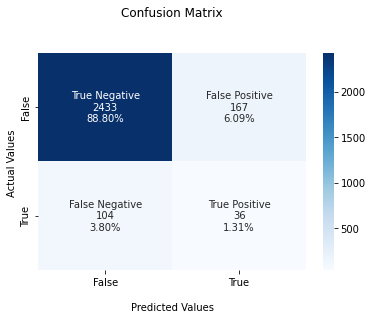

In [57]:
#visualisasi dengan confussion matrix
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

actualData = ytest
predictedData = y_pred
confusion_matrix = confusion_matrix(actualData,predictedData)

counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
percentage = group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
names = ['True Negative','False Positive','False Negative','True Positive']
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(names,counts,percentage)]

labels = np.asarray(labels).reshape(2,2)
heatMap = sn.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

heatMap.set_title('Confusion Matrix\n\n')
heatMap.set_xlabel('\nPredicted Values')
heatMap.set_ylabel('Actual Values ')

heatMap.xaxis.set_ticklabels(['False','True'])
heatMap.yaxis.set_ticklabels(['False','True'])
plt.show

**Visualisasi Decision Tree**

In [58]:
#membuat visualisasi dari decision tree
from sklearn.tree import export_graphviz
export_graphviz(tree_data, out_file = "Decision_Tree.dot", class_names = ["1", "0"], feature_names = cleanDataset.columns, impurity = True, filled = True)

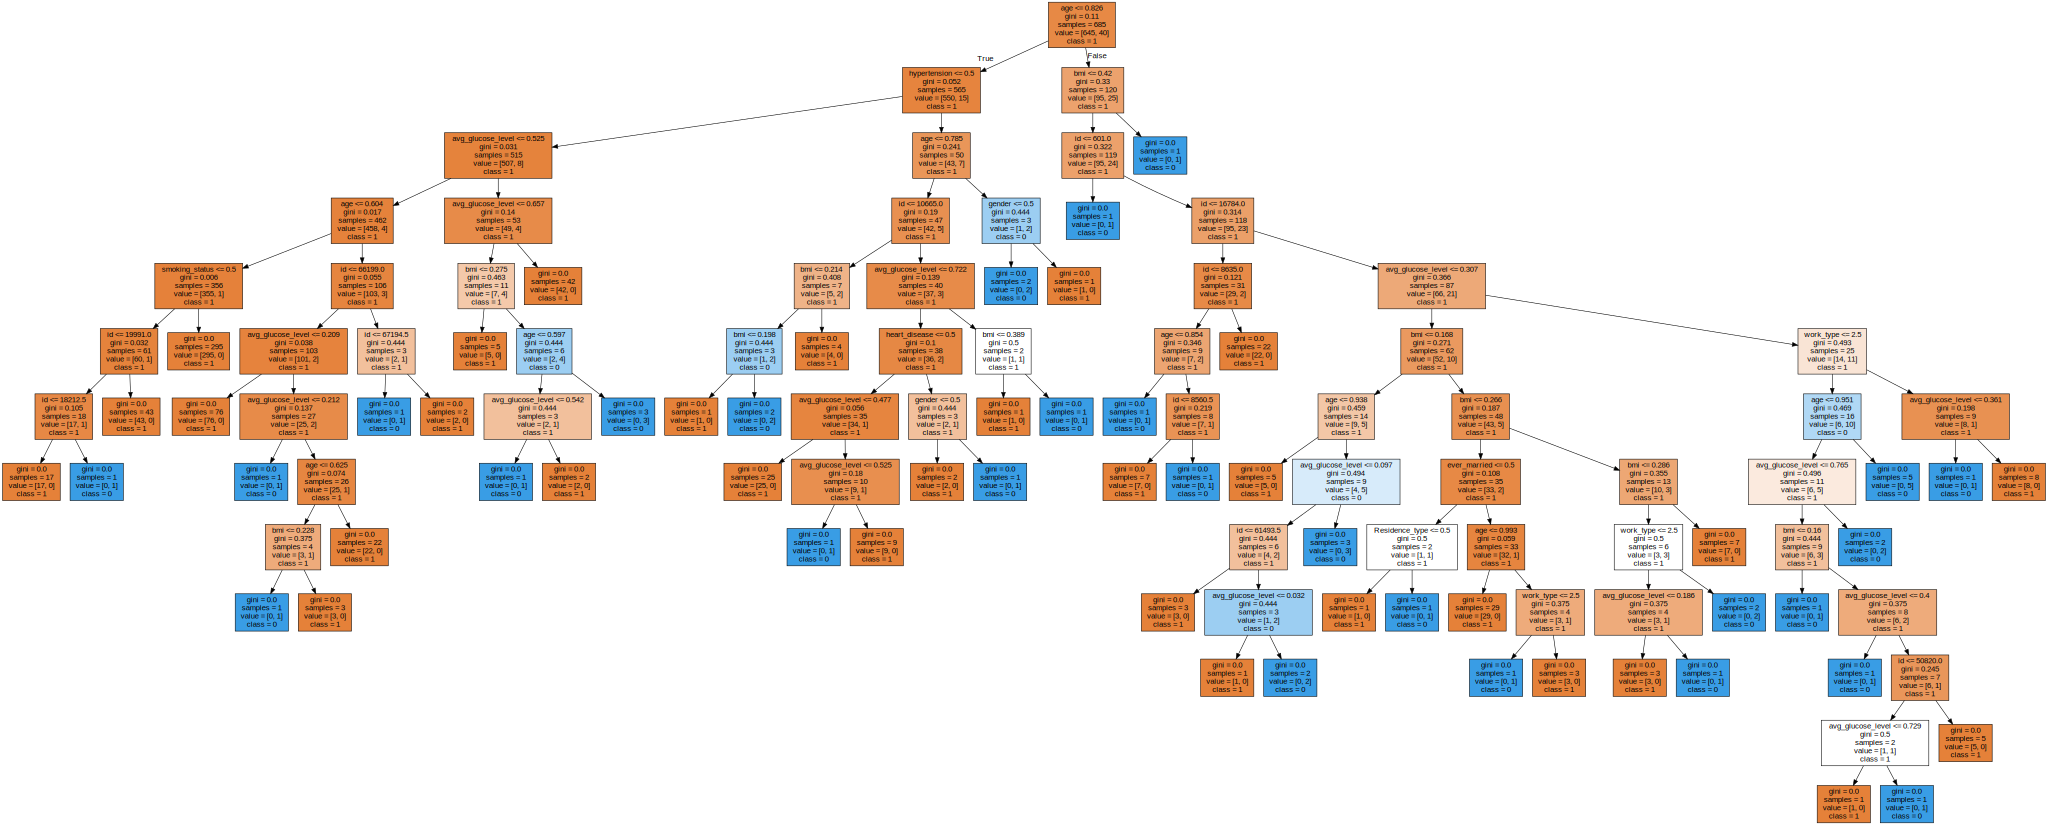

In [59]:
#menampilkan hasil visualisasi dari decision tree
import graphviz
import pydotplus

with open("Decision_Tree.dot") as fig:  
  dot_graph = fig.read()
graphviz.Source(dot_graph)